In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Assuming you have a DataFrame called 'df' containing city, pollutant, and numeric_value columns
df=pd.read_csv(r"C:\Users\Hp\OneDrive - Politecnico di Milano\Desktop\prova_se4g\output\Lalalal.csv",encoding="unicode_escape")
#serve metterci dentro il csv del dataframe completo perchè per convertire in gpd servono x e y sampling points 
df.head()
df.columns


Index(['Unnamed: 0', 'network_country', 'network_localid', 'network_name',
       'network_namespace', 'network_timezone', 'pollutant',
       'samplingpoint_localid', 'samplingpoint_namespace', 'sampligpoint_x',
       'samplingpoint_y', 'coordsys', 'station_code', 'station_localid',
       'station_name', 'station_namespace', 'value_datetime_begin',
       'value_datetime_end', 'value_datetime_inserted',
       'value_datetime_updated', 'value_numeric', 'value_validity',
       'value_verification', 'station_altitude', 'value_unit'],
      dtype='object')

In [13]:
# Convert the DataFrame to a GeoDataFrame by specifying the geometry column (e.g., coordinates)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.sampligpoint_x, df.samplingpoint_y))

In [15]:
# Group the data by pollutant and calculate the mean pollutant value for each city
grouped = gdf.groupby(['pollutant', 'station_code']).mean()


C:\Users\Hp\AppData\Local\Temp\ipykernel_22760\1264239389.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = gdf.groupby(['pollutant', 'station_code']).mean()


In [16]:
# Reset the index to make the pollutant and city columns accessible
grouped = grouped.reset_index()

In [17]:
# Create a new GeoDataFrame using the grouped data
gdf_mean = gpd.GeoDataFrame(grouped, geometry=gpd.points_from_xy(grouped.sampligpoint_x, grouped.samplingpoint_y))

C:\Users\Hp\Downloads\FolderAnaconda\envs\angelica_se4g\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


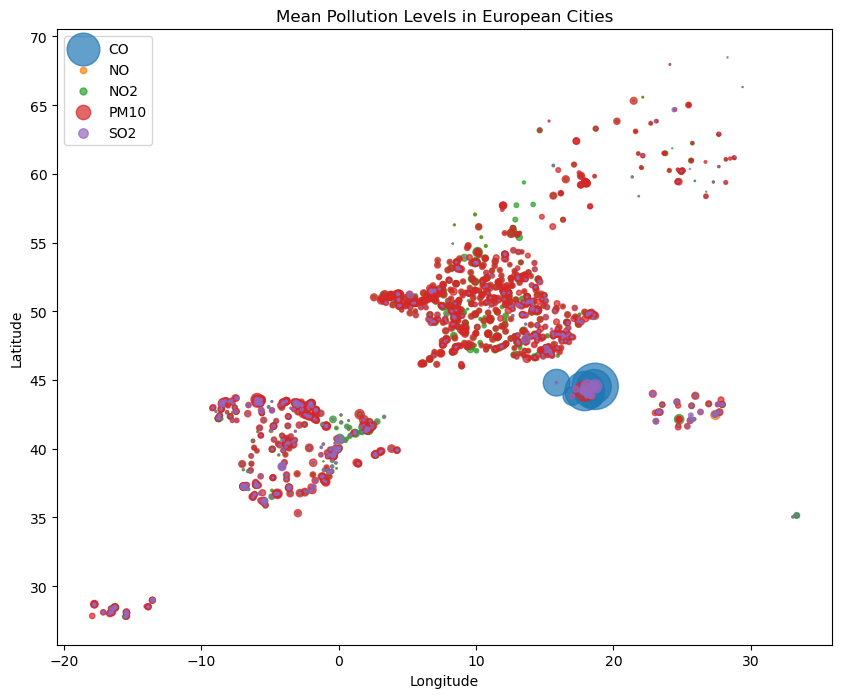

In [18]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over the unique pollutants and plot their mean values
for pollutant in gdf_mean['pollutant'].unique():
    subset = gdf_mean[gdf_mean['pollutant'] == pollutant]
    subset.plot(ax=ax, markersize=subset['value_numeric'], label=pollutant, alpha=0.7)

# Add legend, title, and labels
ax.legend()
ax.set_title('Mean Pollution Levels in European Cities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the map
plt.show()






In [20]:
 #Get the unique pollutants in the dataset
pollutants = grouped['pollutant'].unique()


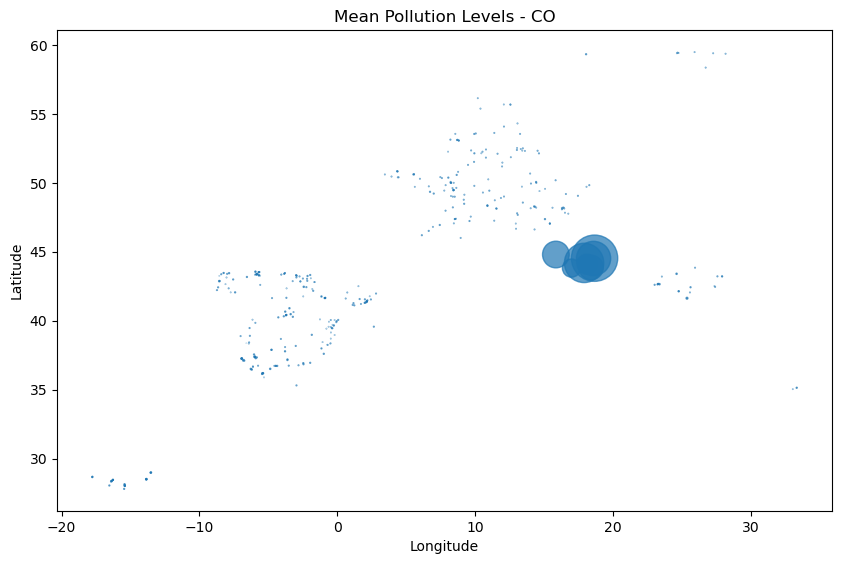

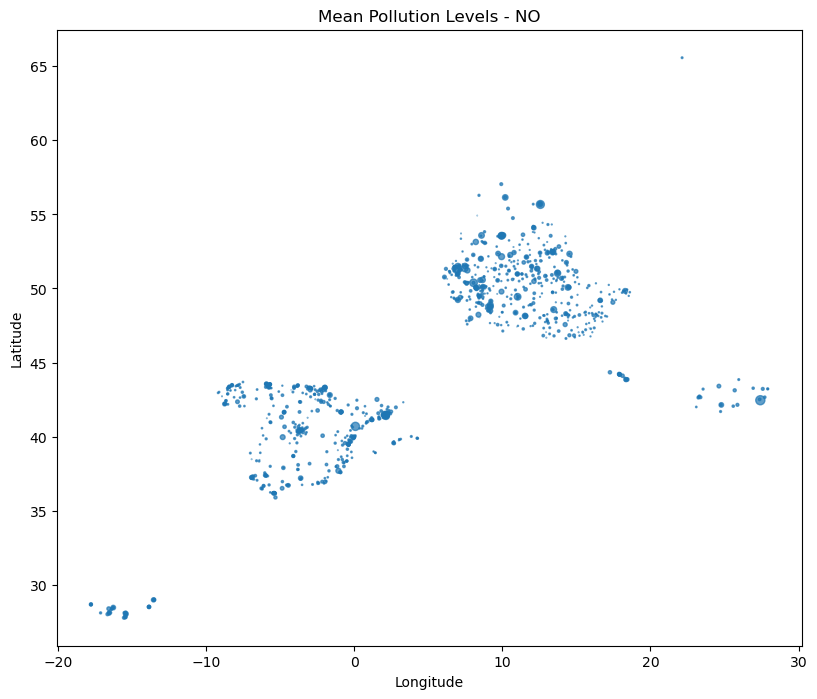

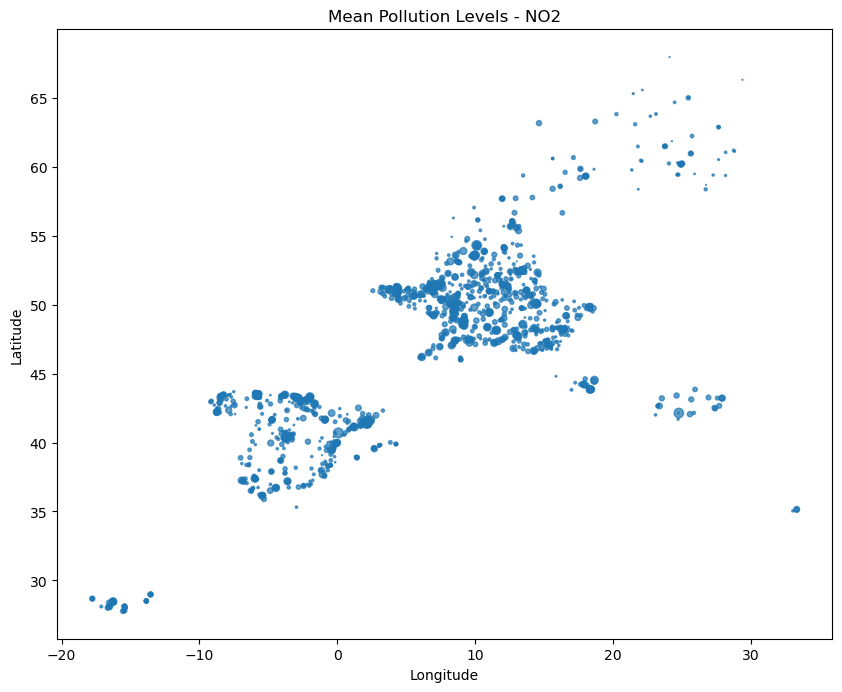

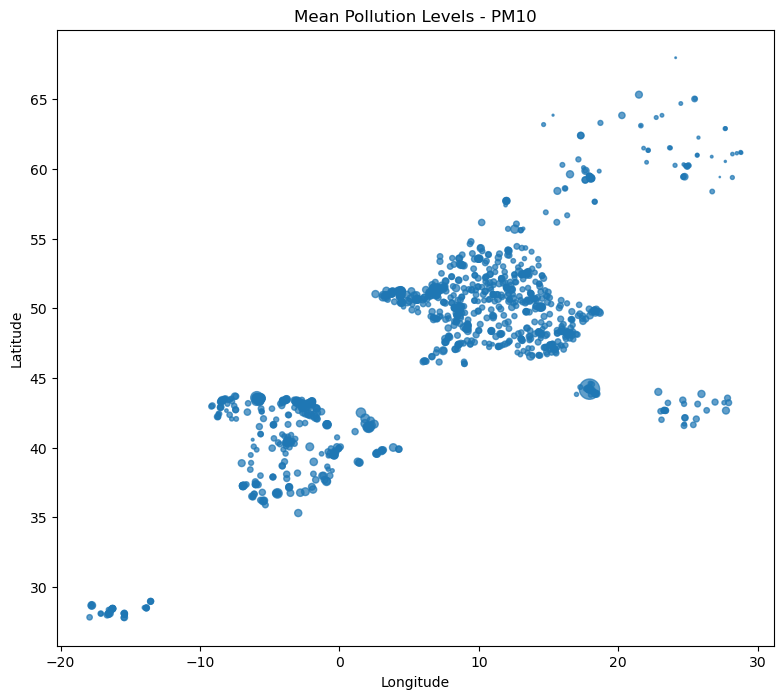

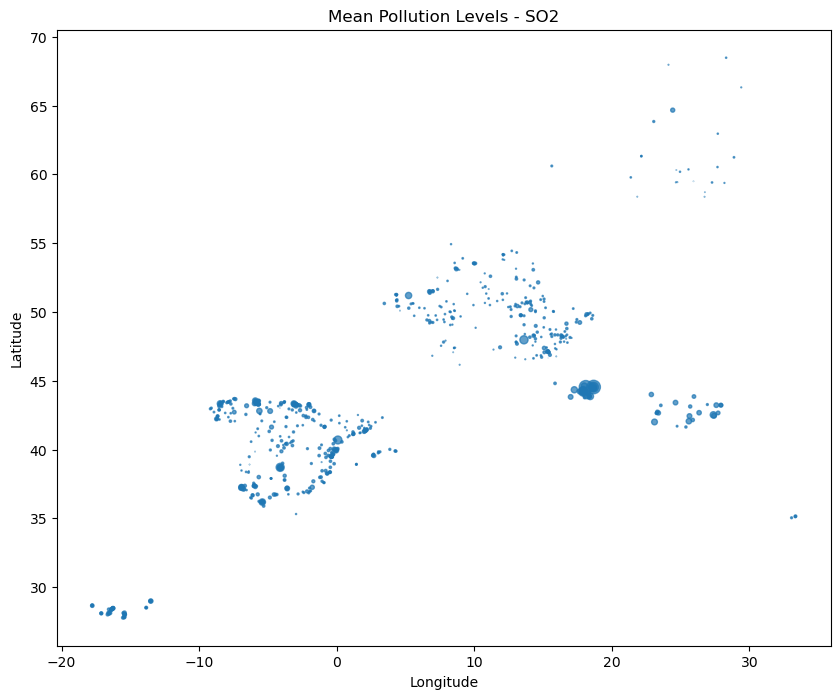

In [23]:
# Plot a map for each pollutant
for pollutant in pollutants:
    # Create a subset for the current pollutant
    subset = grouped[grouped['pollutant'] == pollutant]

    # Create a new GeoDataFrame for the current pollutant
    gdf_mean = gpd.GeoDataFrame(subset, geometry=gpd.points_from_xy(subset.sampligpoint_x, subset.samplingpoint_y))

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the mean values for the current pollutant
    gdf_mean.plot(ax=ax, markersize=gdf_mean['value_numeric'], alpha=0.7)

    # Add title and labels
    ax.set_title(f"Mean Pollution Levels - {pollutant}")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Display the map
    plt.show()







